# DSCI 592 Capstone II: Group Project
## Team: Safe CIty
## NYC Bronx - Data Processing

In [160]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import numpy as np
from pandas import DataFrame

## 1. Data Cleaning

In [161]:
bronx = pd.read_csv('bronx_addr2.csv') 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Drop attributes
- cmplnt_num
- cmplnt_fr_dt
- cmplnt_fr_tm
- crm_atpt_cptd_cd
- boro_nm
- parks_nm
- Number
- City
- State
- Country

In [162]:
attributes_to_drop = ['cmplnt_num', 'cmplnt_fr_dt', 'crm_atpt_cptd_cd', 'cmplnt_fr_tm', 'boro_nm', 
                      'parks_nm','Number', 'City', 'State', 'Country']
df = bronx.drop(attributes_to_drop, axis = 1)
df = df.dropna(subset=['Zip'])

In [163]:
print(df.groupby('Zip').count().index[0:50])

Index([10013.0, 10014.0, 10023.0, 10029.0, 10032.0, 10451.0, 10452.0, 10453.0,
       10454.0, 10455.0, 10456.0, 10457.0, 10458.0, 10459.0, 10460.0, 10461.0,
       10462.0, 10463.0, 10464.0, 10465.0, 10466.0, 10467.0, 10468.0, 10469.0,
       10470.0, 10471.0, 10472.0, 10473.0, 10474.0, 10475.0, 10704.0, 10803.0,
       11205.0, 11208.0, 11212.0, 11221.0, 11225.0, 11226.0, 11237.0, 11361.0,
       11365.0, 11370.0, '10013', '10027', '10030', '10031', '10032', '10033',
       '10035', '10301'],
      dtype='object', name='Zip')


In [164]:
print(df.groupby('Zip').count().index[50:])

Index(['10451', '10452', '10453', '10454', '10454-4606', '10455', '10456',
       '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464',
       '10465', '10465-3826', '10466', '10467', '10468', '10469', '10470',
       '10471', '10472', '10473', '10474', '10475', '10550', '10705', '10803',
       '11103', '11201', '11205', '11208', '11210', '11212', '11213', '11214',
       '11220', '11221', '11223', '11224', '11225', '11230', '11231', '11236',
       '11237', '11370', '11373', '11413', '11693'],
      dtype='object', name='Zip')


In [165]:
# Replace zip code with extension
# 10465-3826-> 110465
df['Zip'].replace('10465-3826', '10465', inplace=True)
df['Zip'].replace('10454-4606', '10454', inplace=True)

In [166]:
# Treat mixed data type in "Zip" column
df = df.astype({"Zip": int})
df = df.astype({"Zip": str})

In [167]:
# Bronx zip 10451~10475
index_to_remove = [x for x in df.groupby('Zip').count().index if (x < '10451') or (x > '10475') ]

# Slice dataframe
for zipcode in index_to_remove:
    df = df[df["Zip"] != zipcode]

In [168]:
bronx_zip = list(df['Zip'].unique())
bronx_zip.sort()
print(bronx_zip)

['10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463', '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475']


In [169]:
len(df['Zip'].unique())

25

## Law category
- "Felony" means an offense for which a sentence to a term of imprisonment in excess of one year may be imposed.
- "Misdemeanor" means an offense, other than a "traffic infraction, " for which a sentence to a term of imprisonment in excess of fifteen days may be imposed, but for which a sentence to a term of imprisonment in excess of one year cannot be imposed.
- "Violation" means an offense, other than a "traffic infraction", for which a sentence to a term of imprisonment in excess of fifteen days cannot be imposed.

In [170]:
df['law_cat_cd'].unique()

array(['MISDEMEANOR', 'FELONY', 'VIOLATION'], dtype=object)

## Offense description

### Rows to remove: ofns description total count < 1000

In [171]:
df['ofns_desc'].value_counts()[0:29]

HARRASSMENT 2                     78174
PETIT LARCENY                     75100
ASSAULT 3 & RELATED OFFENSES      66967
CRIMINAL MISCHIEF & RELATED OF    53296
GRAND LARCENY                     31440
FELONY ASSAULT                    28126
DANGEROUS DRUGS                   27056
OFF. AGNST PUB ORD SENSBLTY &     22486
ROBBERY                           17917
BURGLARY                          11691
OFFENSES AGAINST PUBLIC ADMINI    10981
DANGEROUS WEAPONS                 10142
MISCELLANEOUS PENAL LAW            9008
VEHICLE AND TRAFFIC LAWS           7674
GRAND LARCENY OF MOTOR VEHICLE     7305
SEX CRIMES                         5577
FORGERY                            4189
INTOXICATED & IMPAIRED DRIVING     3544
CRIMINAL TRESPASS                  2396
THEFT-FRAUD                        2329
FRAUDS                             1840
RAPE                               1560
POSSESSION OF STOLEN PROPERTY      1558
OFFENSES INVOLVING FRAUD           1530
ADMINISTRATIVE CODE                1353


In [172]:
index_to_remove = list(df['ofns_desc'].value_counts()[29:].index)
print(index_to_remove)

['NYS LAWS-UNCLASSIFIED FELONY', 'THEFT OF SERVICES', 'OTHER STATE LAWS (NON PENAL LA', 'PROSTITUTION & RELATED OFFENSES', 'ALCOHOLIC BEVERAGE CONTROL LAW', 'GAMBLING', 'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', "BURGLAR'S TOOLS", 'KIDNAPPING & RELATED OFFENSES', 'FRAUDULENT ACCOSTING', 'OFFENSES RELATED TO CHILDREN', 'PETIT LARCENY OF MOTOR VEHICLE', 'OFFENSES AGAINST PUBLIC SAFETY', 'CHILD ABANDONMENT/NON SUPPORT', 'ENDAN WELFARE INCOMP', 'DISORDERLY CONDUCT', 'HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'ESCAPE 3', 'JOSTLING', 'ANTICIPATORY OFFENSES', 'KIDNAPPING', 'NYS LAWS-UNCLASSIFIED VIOLATION', 'OTHER STATE LAWS', 'FELONY SEX CRIMES', 'UNLAWFUL POSS. WEAP. ON SCHOOL', 'INTOXICATED/IMPAIRED DRIVING', 'LOITERING/GAMBLING (CARDS, DIC', 'NEW YORK CITY HEALTH CODE', 'ABORTION', 'HOMICIDE-NEGLIGENT-VEHICLE', 'OFFENSES AGAINST MARRIAGE UNCL']


In [173]:
# Slice dataframe
for desc in index_to_remove:
    df = df[df["ofns_desc"] != desc]

In [174]:
len(df["ofns_desc"].value_counts())

29

In [175]:
df.shape

(487939, 21)

## Bronx data (bronx_df.csv)
- Zip code cleaning
- Offense description cleaning

In [176]:
# Write to a csv file
df.to_csv("df_bronx.csv", index = False)

## 2. EDA

## Crime distribution by zip code

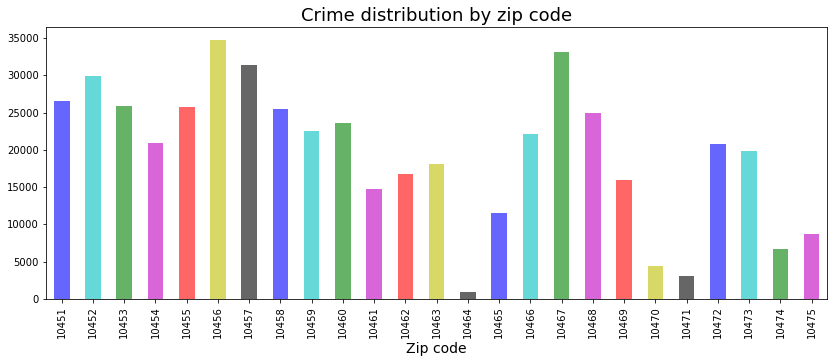

In [177]:
# Zip-code
fig = plt.figure(figsize = (14,5))
_ = df['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Crime distribution by zip code", fontsize=18)
_ = plt.xlabel('Zip code', fontsize = 14)

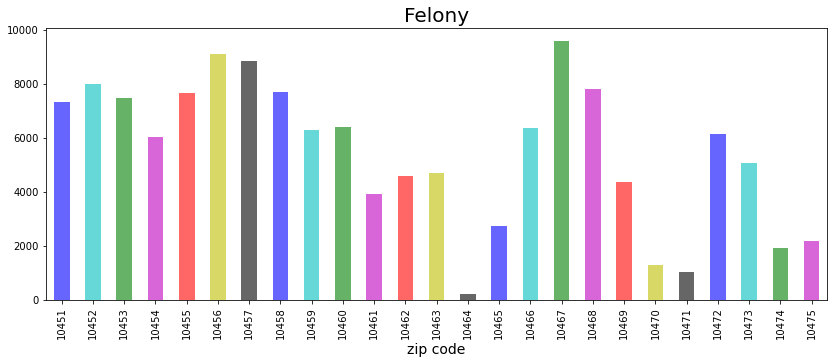

In [178]:
# Felony by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='FELONY']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Felony",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

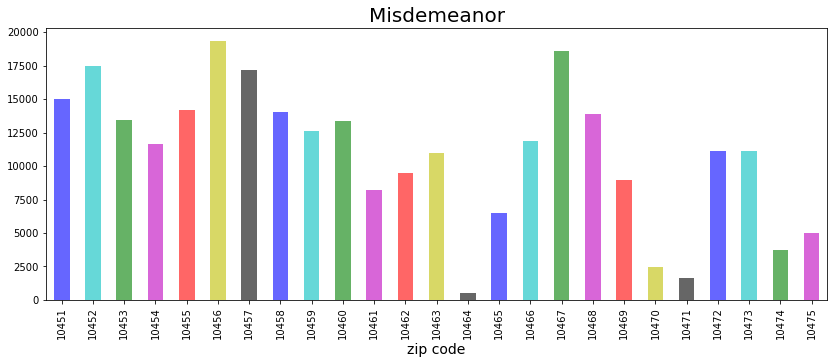

In [179]:
# MISDEMEANOR by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='MISDEMEANOR']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Misdemeanor",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

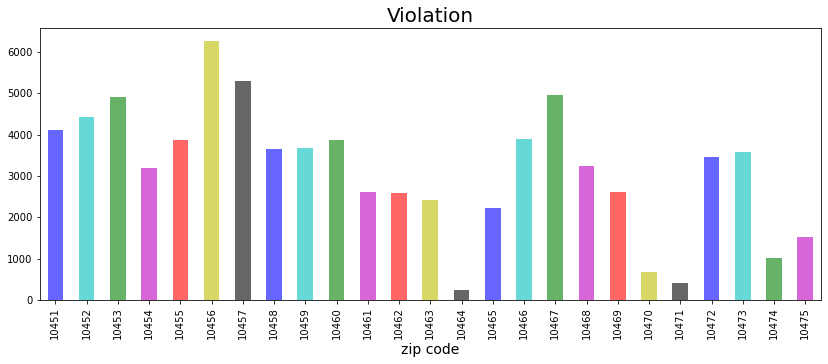

In [180]:
# Violation by Zip-code
fig = plt.figure(figsize = (14,5))
_ = df[df['law_cat_cd']=='VIOLATION']['Zip'].value_counts().sort_index().plot(
    kind='bar', alpha = 0.6, color=['b','c', 'g','m','r', 'y', 'k'])
_ = plt.title("Violation",fontsize = 20)
_ = plt.xlabel("zip code",fontsize = 14)

## Make dataframe of "zip"-"law-cat-cd" with averaged lattitude and longitude

- Crosstab Zip & law_cat_cd

In [181]:
ctab_zip_law = pd.crosstab(df['Zip'],df['law_cat_cd'])

# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in bronx_zip:    # bronx_zip: zip list of Bronx
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

df_zip_law = pd.DataFrame(dict(ctab_zip_law))
# Add total crime count for each zip code
df_zip_law['Crime'] = df_zip_law['FELONY']+df_zip_law['MISDEMEANOR']+df_zip_law['VIOLATION']

# Add lattitude and longitude of each zip location to dataframe
df_zip_law['zip'] = df_zip_law.index
df_zip_law = df_zip_law.reset_index(drop=True)
df_zip_law['latitude'] = loc_add['latitude']
df_zip_law['longitude'] = loc_add['longitude']
df_zip_law.head(5)

,FELONY,MISDEMEANOR,VIOLATION,Crime,zip,latitude,longitude
0,7348,15042,4106,26496,10451,40.821109,-73.920985
1,7991,17451,4419,29861,10452,40.837664,-73.921406
2,7494,13431,4918,25843,10453,40.852023,-73.911923
3,6045,11657,3179,20881,10454,40.808346,-73.919634
4,7670,14203,3860,25733,10455,40.815511,-73.911388


In [182]:
df_zip_law.shape

(25, 7)

In [183]:
# Write to a csv file
df_zip_law.to_csv("df_bronx_zip_law.csv", index = False)

## Crime count heatmap

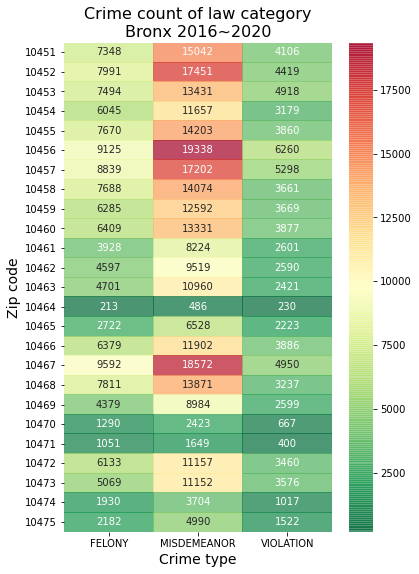

In [184]:
df_select = df_zip_law[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,9))
sns.heatmap(df_select, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count of law category\nBronx 2016~2020', fontsize=16)
plt.show()

## Convert frequency to relative percentage of each law category

In [185]:
df_zip_law_pct = df_zip_law.copy()
df_zip_law_pct = df_zip_law_pct.drop('Crime', axis = 1)
df_zip_law_pct['FELONY'] = df_zip_law['FELONY']/df_zip_law['FELONY'].sum()*100
df_zip_law_pct['MISDEMEANOR'] = df_zip_law['MISDEMEANOR']/df_zip_law['MISDEMEANOR'].sum()*100
df_zip_law_pct['VIOLATION'] = df_zip_law['VIOLATION']/df_zip_law['VIOLATION'].sum()*100
df_zip_law_pct['Crime'] = df_zip_law['Crime']/df_zip_law['Crime'].sum()*100

df_zip_law_pct.head(5)

,FELONY,MISDEMEANOR,VIOLATION,zip,latitude,longitude,Crime
0,5.368559,5.521175,5.222191,10451,40.821109,-73.920985,5.430187
1,5.838344,6.405400,5.620278,10452,40.837664,-73.921406,6.119822
2,5.475228,4.929857,6.254928,10453,40.852023,-73.911923,5.296359
3,4.416567,4.278709,4.043192,10454,40.808346,-73.919634,4.279428
4,5.603817,5.213220,4.909318,10455,40.815511,-73.911388,5.273815


In [186]:
# Write to a csv file
df_zip_law_pct.to_csv("df_bronx_zip_law_pct.csv", index = False)

## Crime ratio heatmap

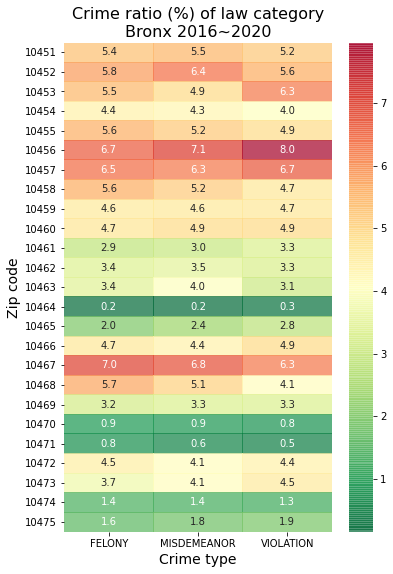

In [187]:
df_select = df_zip_law_pct[['FELONY','MISDEMEANOR','VIOLATION','zip' ]]
df_select = df_select.set_index('zip')   # set index using zip
plt.figure(figsize=(6,9))
sns.heatmap(df_select, annot=True, fmt='.1f', cmap='RdYlGn_r', alpha=0.7)
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) of law category\nBronx 2016~2020', fontsize=16)
plt.show()

## Crime heatmap on the map

In [189]:
# plot_heatmap(category, data_file)
# prameter
#  category (string): crime category to plot 
#  data_file (dataframe): data to plot 
#     percentage distribution otherwise change colorbar label
def plot_heatmap(category, data_file):
    fig = plt.figure(figsize=(10,8))
    plt.scatter(data_file["longitude"],data_file["latitude"], 
                alpha = 0.8, s=100*data_file[category], marker='o',
                c= data_file[category], cmap='RdYlGn_r')
    title_string = category + ' (Bronx)'
    plt.title(title_string, fontsize = 20)
    plt.xlabel('Longitude', fontsize = 16)
    plt.ylabel('Latitude', fontsize = 16)
    cbar = plt.colorbar()
    ny_img = mpimg.imread("NY_Bronx_map.png")
    plt.imshow(ny_img, extent=[-73.966, -73.765, 40.79, 40.92], alpha=0.4)
    cbar.set_label("Percentage distribution in Zip code area", fontsize=12)
    plt.show()    

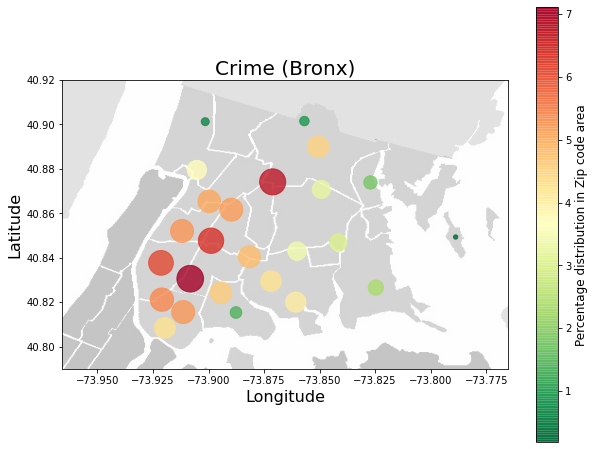

In [190]:
caterory = "Crime"
plot_heatmap(caterory, df_zip_law_pct)

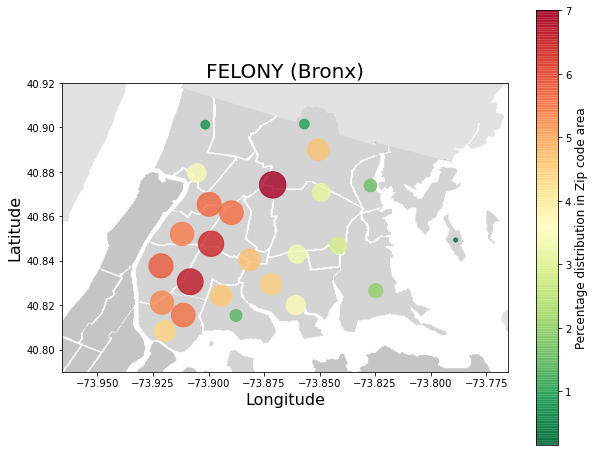

In [191]:
caterory = "FELONY"
plot_heatmap(caterory, df_zip_law_pct)

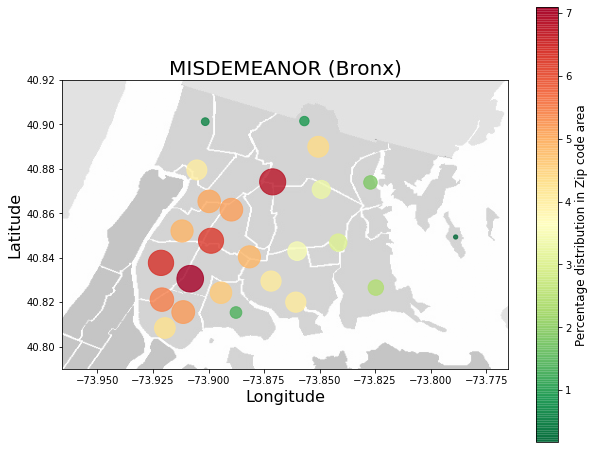

In [192]:
caterory = "MISDEMEANOR"
plot_heatmap(caterory, df_zip_law_pct)

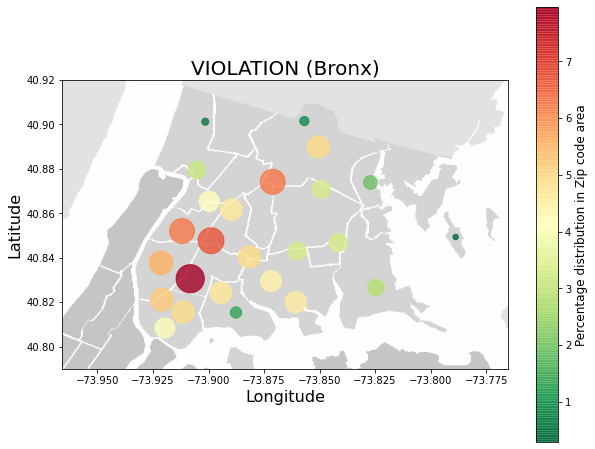

In [193]:
caterory = "VIOLATION"
plot_heatmap(caterory, df_zip_law_pct)

## Crosstab of Offense description and Zip code

In [194]:
# Commpute mean lattitude and longitude of each zip location
add_zip = []
for i in bronx_zip:    # bronx_zip: zip list of Brooklyn
    loc_mean = df[df['Zip'] == i][['latitude','longitude']].mean()
    add_zip.append((loc_mean[0], loc_mean[1]))
                        
loc_add = pd.DataFrame(add_zip, columns=['latitude','longitude'])

In [195]:
ctab_zip_ofns_desc = pd.crosstab(df['Zip'],df['ofns_desc'])

# Add lattitude and longitude of each zip location to dataframe
df_zip_ofns = pd.DataFrame(dict(ctab_zip_ofns_desc))
df_zip_ofns['zip'] = df_zip_ofns.index
df_zip_ofns = df_zip_ofns.reset_index(drop=True)
df_zip_ofns['latitude'] = loc_add['latitude']
df_zip_ofns['longitude'] = loc_add['longitude']
df_zip_ofns.head(5)

,ADMINISTRATIVE CODE,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,65,68,3556,545,2832,123,1922,611,1488,332,...,88,137,925,463,89,60,309,10451,40.821109,-73.920985
1,65,38,4184,569,3328,246,1159,613,1725,435,...,88,160,1105,633,207,45,388,10452,40.837664,-73.921406
2,75,44,4159,719,2747,80,1348,423,1701,344,...,89,0,1088,0,106,39,373,10453,40.852023,-73.911923
3,43,106,2990,493,2060,146,1490,528,1322,187,...,65,156,816,631,75,48,306,10454,40.808346,-73.919634
4,63,59,3239,502,2412,128,2939,688,1673,366,...,112,0,1063,0,96,38,278,10455,40.815511,-73.911388


In [196]:
df_zip_ofns.shape

(25, 32)

In [197]:
# Write to a csv file
df_zip_ofns.to_csv("df_bronx_zip_ofns.csv", index = False)

## Convert frequency to relative percentage of each offense description

In [198]:
col_names = list(df_zip_ofns.keys())
print(col_names)

['ADMINISTRATIVE CODE', 'ARSON', 'ASSAULT 3 & RELATED OFFENSES', 'BURGLARY', 'CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL TRESPASS', 'DANGEROUS DRUGS', 'DANGEROUS WEAPONS', 'FELONY ASSAULT', 'FORGERY', 'FRAUDS', 'GRAND LARCENY', 'GRAND LARCENY OF MOTOR VEHICLE', 'HARRASSMENT 2', 'INTOXICATED & IMPAIRED DRIVING', 'MISCELLANEOUS PENAL LAW', 'OFF. AGNST PUB ORD SENSBLTY &', 'OFFENSES AGAINST PUBLIC ADMINI', 'OFFENSES AGAINST THE PERSON', 'OFFENSES INVOLVING FRAUD', 'OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY', 'POSSESSION OF STOLEN PROPERTY', 'RAPE', 'ROBBERY', 'SEX CRIMES', 'THEFT-FRAUD', 'UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS', 'zip', 'latitude', 'longitude']


In [199]:
df_zip_ofns_pct = df_zip_ofns.copy()
for index in col_names[:-3]:
    column = df_zip_ofns_pct[index]
    df_zip_ofns_pct[index] = column/column.sum()*100
df_zip_ofns_pct.head(5)

,ADMINISTRATIVE CODE,ARSON,ASSAULT 3 & RELATED OFFENSES,BURGLARY,CRIMINAL MISCHIEF & RELATED OF,CRIMINAL TRESPASS,DANGEROUS DRUGS,DANGEROUS WEAPONS,FELONY ASSAULT,FORGERY,...,POSSESSION OF STOLEN PROPERTY,RAPE,ROBBERY,SEX CRIMES,THEFT-FRAUD,UNAUTHORIZED USE OF A VEHICLE,VEHICLE AND TRAFFIC LAWS,zip,latitude,longitude
0,4.804139,6.595538,5.310078,4.661706,5.313720,5.133556,7.103785,6.024453,5.290479,7.925519,...,5.648267,8.782051,5.162695,8.301954,3.821383,5.190311,4.026583,10451,40.821109,-73.920985
1,4.804139,3.685742,6.247853,4.866992,6.244371,10.267112,4.283708,6.044173,6.133115,10.384340,...,5.648267,10.256410,6.167327,11.350188,8.887935,3.892734,5.056033,10452,40.837664,-73.921406
2,5.543237,4.267701,6.210522,6.150030,5.154233,3.338898,4.982259,4.170775,6.047785,8.211984,...,5.712452,0.000000,6.072445,0.000000,4.551310,3.373702,4.860568,10453,40.852023,-73.911923
3,3.178123,10.281280,4.464886,4.216919,3.865206,6.093489,5.507096,5.206074,4.700277,4.464073,...,4.172015,10.000000,4.554334,11.314327,3.220266,4.152249,3.987490,10454,40.808346,-73.919634
4,4.656319,5.722599,4.836711,4.293901,4.525668,5.342237,10.862655,6.783672,5.948233,8.737169,...,7.188703,0.000000,5.932913,0.000000,4.121941,3.287197,3.622622,10455,40.815511,-73.911388


In [200]:
df_zip_ofns_pct.shape

(25, 32)

In [201]:
# Write to a csv file
df_zip_ofns_pct.to_csv("df_bronx_zip_ofns_pct.csv", index = False)

In [202]:
col_names[-3]

'zip'

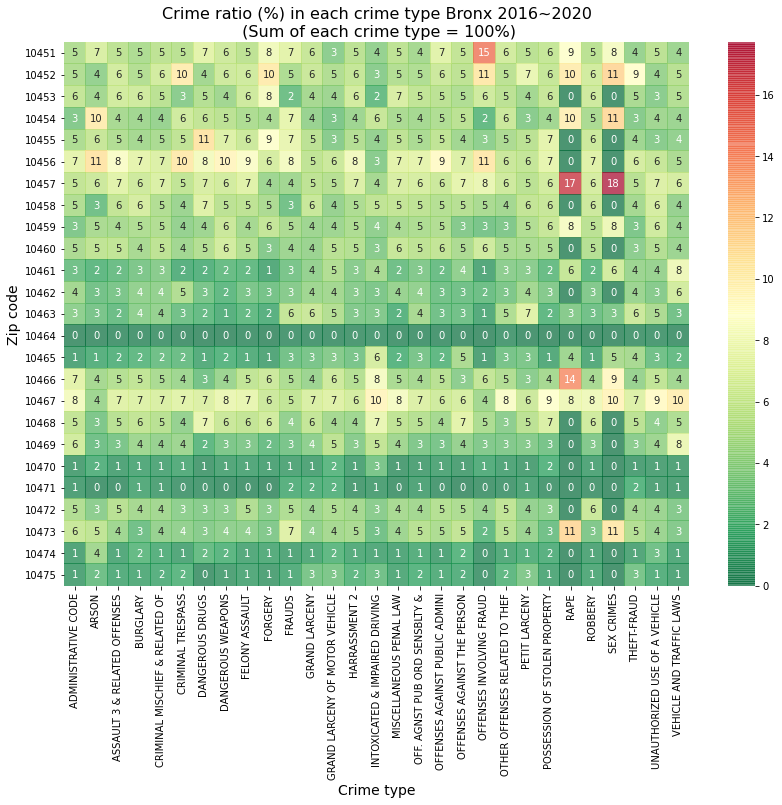

In [203]:
df2_plot = df_zip_ofns_pct[[x for x in col_names[0:-2]]]
df2_plot = df2_plot.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(14,10))
sns.heatmap(df2_plot, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime ratio (%) in each crime type Bronx 2016~2020\n (Sum of each crime type = 100%)', fontsize=16)
plt.show()

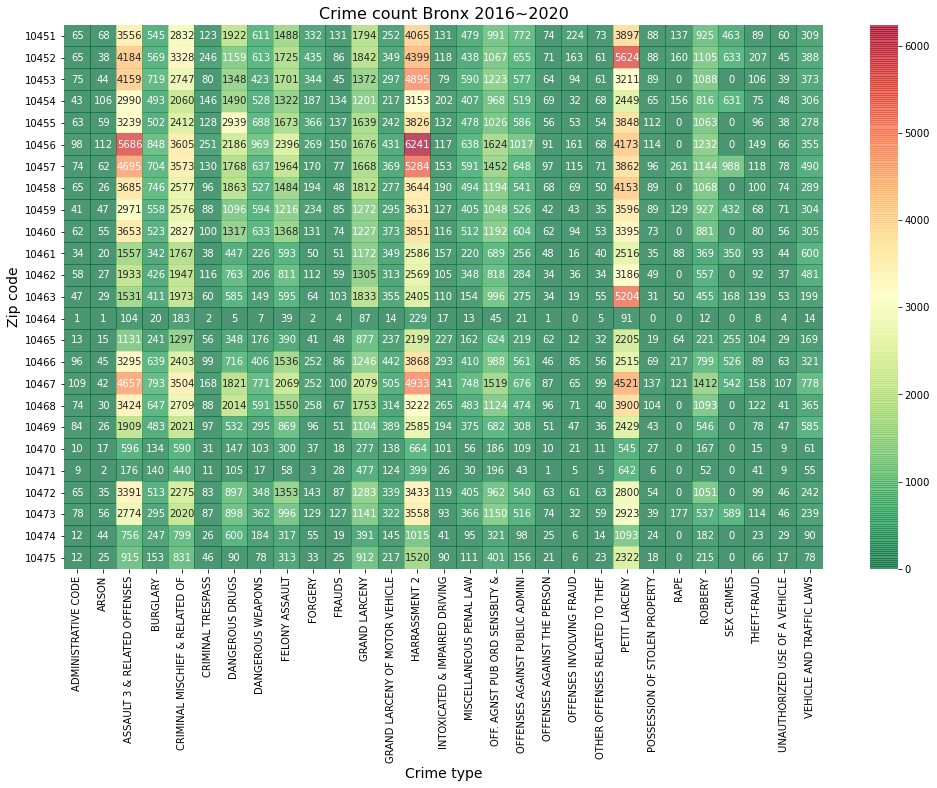

In [204]:
df2_plot2 = df_zip_ofns[[x for x in col_names[0:-2]]]
df2_plot2 = df2_plot2.set_index(col_names[-3])   # set index using zip
plt.figure(figsize=(17,10))
sns.heatmap(df2_plot2, annot=True, fmt='.0f', cmap='RdYlGn_r', alpha=0.7)  # annot=True for values
plt.xlabel('Crime type', fontsize=14)
plt.ylabel('Zip code', fontsize=14)
plt.title('Crime count Bronx 2016~2020', fontsize=16)
plt.show()

## Plot by crime type

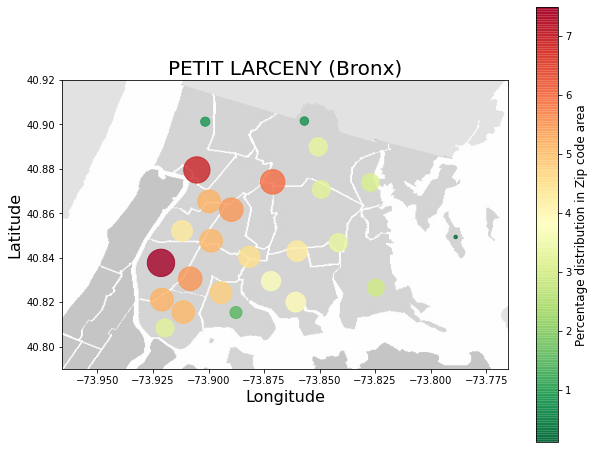

In [205]:
caterory = "PETIT LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

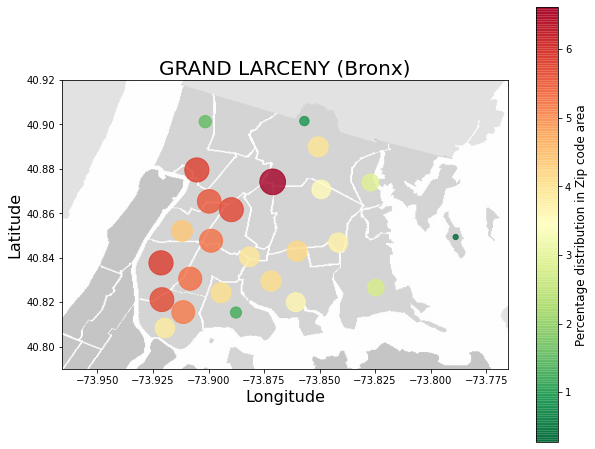

In [206]:
caterory = "GRAND LARCENY"
plot_heatmap(caterory, df_zip_ofns_pct)

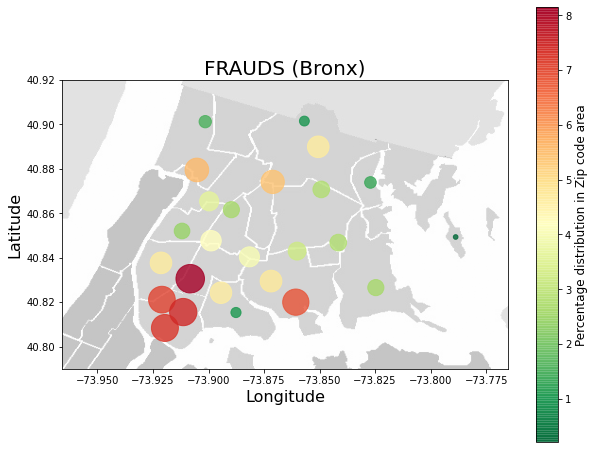

In [207]:
caterory = "FRAUDS"
plot_heatmap(caterory, df_zip_ofns_pct)

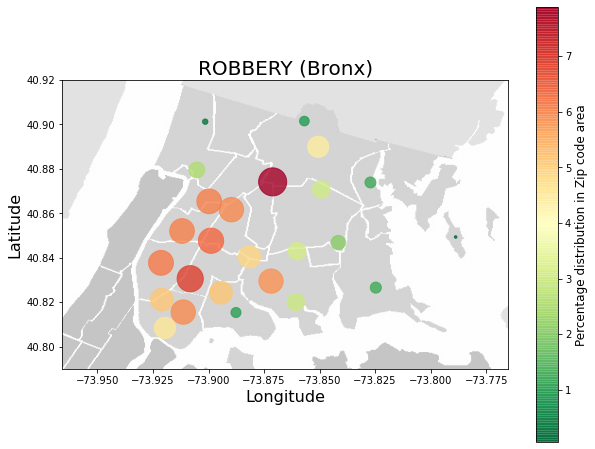

In [208]:
caterory = "ROBBERY"
plot_heatmap(caterory, df_zip_ofns_pct)

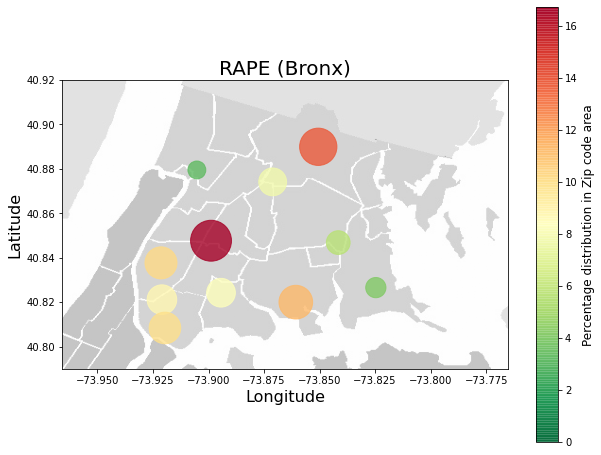

In [209]:
caterory = "RAPE"
plot_heatmap(caterory, df_zip_ofns_pct)

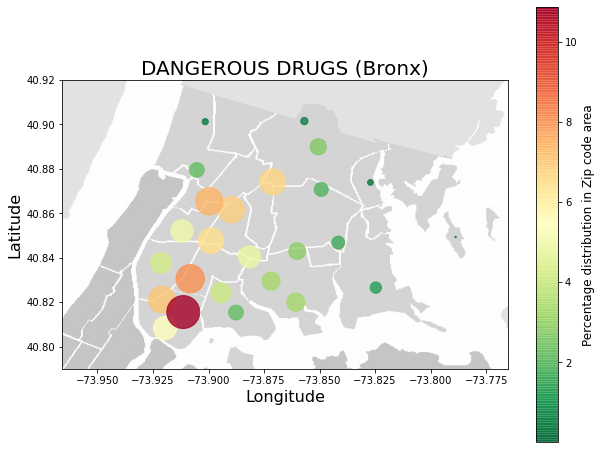

In [210]:
caterory = "DANGEROUS DRUGS"
plot_heatmap(caterory, df_zip_ofns_pct)